## Introduction

Hello and welcome to the introduction notebook of this repo! Hopefully you have run the `run.sh` script at the top level of this repository and have accessed this notebook successfully! This repo is the culmination of work from `cmrfrd`, `iopoi`, and `cfu288` for the kaggle nyc taxi competition.

The goal of this competition is to best predict a taxi fare given the pickup location, drop off location, and number of passengers. We are provided with 55 million taxi trips with the given price and about 10 thousand unknown trips. Whoever can best and most accurately predict the prices is the best!

## Basic setup

If you already have the dataset in this `/home/jovyan/work/data/` directory of your container you can skip this step!

Reference: https://github.com/Kaggle/kaggle-api

In order for you to replicate our model and out results we need you to have a copy of the dataset on your machine. In order to get that dataset, the easiest for both of us for you to obtain it is through kaggle. So in order to proceed we need you to have a kaggle account set up.

Set one up here: https://www.kaggle.com/

Assuming you now have a kaggle account set up, we need you to copy your special credentials kaggle has given you (this can be found [here](`https://www.kaggle.com/<username>/account`)). Follow the next few steps to continue and download the dataset!

1. Go to `https://www.kaggle.com/<username>/account`
2. Download your credentials called 'kaggle.json' to your host machine
3. Click the `Upload Files` button in the File browser toolbar to upload your 'kaggle.json' credentions
4. Move 'kaggle.json' into the `/home/jovyan/work/data/` directory

Now that your kaggle credentials are set up, continue running the cells

### Configure kaggle environment
By default in this container, the `kaggle` command is installed and it expects the `KAGGLE_CONFIG_DIR` environment variable to be set.

In [1]:
%env KAGGLE_CONFIG_DIR=/home/jovyan/work/data/

env: KAGGLE_CONFIG_DIR=/home/jovyan/work/data/


Now that your environment is confiured to use the `KAGGLE_CONFIG_DIR` environment variable the `kaggle` command can now have access to your downloaded 'kaggle.json' file so it can download the dataset. Run the next cell to download the zip file containing the dataset and extract it to the `KAGGLE_CONFIG_DIR` directory

In [2]:
%%bash
kaggle_files=(test.csv train.csv.zip)
kaggle_unzip_file=train.csv
for i in "${kaggle_files[@]}"
do
    if [ -f "$KAGGLE_CONFIG_DIR$i" ]; then
        echo
    else
        kaggle competitions download -c new-york-city-taxi-fare-prediction -p $KAGGLE_CONFIG_DIR
    fi
done

if [ ! -f "$KAGGLE_CONFIG_DIR$kaggle_unzip_file" ]; then
    unzip -D train.csv.zip
fi

echo "All good!"



All good!


## Visualization

Visualization is a key aspect to understanding the dataset you are working with. It is primarily used to answer fundamental questions that can be easily understood with a graphic. The dataset we will use to answer these questions will be `test.csv`.

Questions:

1. What does the data look like ontop of a map of manhatten?
2. What areas of NYC are more/less popular at different times of the day?
3. Where are the most people picked up in all of NYC?

## Importing dependencies

In the next cell we will import all the dependencies we need to execute the remaining cells of this notebook

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
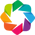

In [3]:
import os
import datetime
import pandas as pd
import holoviews as hv;hv.extension("bokeh")
import geoviews as gv
import dask.dataframe as dd
import cartopy.crs as ccrs

from holoviews.operation.datashader import aggregate, datashade, dynspread, shade, rasterize, spread

import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9

from beakerx import *

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

## 1. What does the data look like?

Because this data is mostly location based data, it would be extremely useful to view it ontop of a map to gain more insight to what our data physically looks like. This can help us better perform future tasks such as data cleaning, clustering visualizations, etc.

In the next cell we will use the [`geoviews`](http://geo.holoviews.org/) library to super impose the pickup and dropoff points in the `test.csv` dataset. We won't use the full training set because of memory constraints for certain devices. We will use a single color to represent both. Feel free to zoom in and check out your favorite destinations!

In [6]:
%%opts WMTS [width=800 height=500]
%opts RGB Points [width=800 height=500 show_legend=True]

## load dataset lazily
pickup_columns = ['pickup_longitude','pickup_latitude']
dropoff_columns = ['dropoff_longitude','dropoff_latitude']
vdim = "passenger_count"
df = dd.read_csv(os.environ["KAGGLE_CONFIG_DIR"] + 'test.csv')

In [7]:
## Create holoviews, then geoviews points object 
def create_points(df, columns, **kwargs):
    points = (hv.Points(df, kdims=columns, vdims=[vdim])
                .options({'Points': {'color': Greys9}}))
    points = gv.Points(points, crs=ccrs.PlateCarree())
    return points

## Create pickup and dropoff points
pickup_points = create_points(df, pickup_columns)
dropoff_points = create_points(df, dropoff_columns)

In [9]:
pickup_points

ValueError: Expected one of [distributed, multiprocessing, processes, single-threaded, sync, synchronous, threading, threads]

:Points   [pickup_longitude,pickup_latitude]   (passenger_count)

In [5]:
def set_active_tool(plot, element):
    plot.state.toolbar.active_scroll = plot.state.tools[0]

# aggregate(dropoff_points,
#           aggregator=ds.count_cat("passenger_count")).options(finalize_hooks=[set_active_tool])
## Merge points and tiles
dynspread(datashade(dropoff_points,
                    aggregator=ds.count_cat("passenger_count"),
                    color_key=ds.colors.inferno,
                    min_alpha=50),
          max_px=10).options(finalize_hooks=[set_active_tool]) * gv.tile_sources.Wikipedia

Invoked as dynamic_operation(height=400, scale=1.0, width=400, x_range=None, y_range=None)


ValueError: Expected one of [distributed, multiprocessing, processes, single-threaded, sync, synchronous, threading, threads]

:DynamicMap   []

## 2. What areas of NYC are more/less popular at different times of the day?

In [6]:
## load dataset lazily
pickup_columns = ['pickup_longitude','pickup_latitude']
dropoff_columns = ['dropoff_longitude','dropoff_latitude']
vdim = "pickup_datetime"
df = dd.read_csv(os.environ["KAGGLE_CONFIG_DIR"] + 'train.csv')

In [10]:
df[vdim].head()[df[vdim].head().str.startswith("2010-")]

1    2010-01-05 16:52:16 UTC
4    2010-03-09 07:51:00 UTC
Name: pickup_datetime, dtype: object

In [33]:
%%opts WMTS [width=800 height=500]
%opts Points [width=800 height=500 show_legend=True]

## load dataset lazily
pickup_columns = ['pickup_longitude','pickup_latitude']
dropoff_columns = ['dropoff_longitude','dropoff_latitude']
vdim = "pickup_datetime"

df = (dd.read_csv(os.environ["KAGGLE_CONFIG_DIR"] + 'test.csv')
        .repartition(npartitions=4)
        .reset_index().set_index('index'))

.loc[df["time"] == v]

In [33]:
f = lambda s:datetime.strptime(s, "%Y-%m-%d %H:%M:%S UTC").hour
#df["time"] = df[vdim].compute().apply(f).astype("category")
df["time"] = df[vdim].compute().apply(f).astype(np.int64)

In [34]:
# hvdf = hv.Dataset(df, kdims=pickup_columns, vdims=["time"])
# hvdf

# hvdf.aggregate(dimensions="time", function=np.mean)

In [35]:
points = \
(hv.Points(df, 
           kdims=pickup_columns, 
           vdims=["passenger_count", "time"])
   .options(color_index='time', 
            cmap='inferno', 
            color_levels=24, 
            colorbar=True))
projected = gv.operation.project_points(points, projection=ccrs.PlateCarree())

In [187]:
projected

:Points   [pickup_longitude,pickup_latitude]   (passenger_count,time)

In [97]:
# half = ds.colors.inferno[::21]
# cmap = half + half[::-1]
# len(cmap)

26

In [98]:
# color_points = hv.NdOverlay({
#     v: hv.Points(df[pickup_columns].loc[df["time"] == v].compute(), 
#                  label=str(v)).options(color_index="time", cmap='inferno', color_levels=24) 
#     for v in df["time"].unique().compute() if v>5}, kdims='k')

In [178]:
# half = inferno[::round(len(inferno)/(len(color_points.data)/2))]
# color_key = (half + half[::-1])[0:len(color_points.data)]
# color_key = list(enumerate(color_key))

# color_key = list(enumerate(inferno[:24]))
# print (len(color_key))

In [179]:
color_key = list(enumerate(Sets1to3[0:24]))

In [186]:
points = hv.NdOverlay({
    v: hv.Points(df[pickup_columns].loc[df["time"] == v].compute(), 
                 label=str(v))
    for v in df["time"].unique().compute() if v>4}, kdims='k')
points = datashade(points,
                   aggregator=ds.count_cat('k'), 
                   normalization="linear")
points = dynspread(points, max_px=50, threshold=0.7)

color_points = hv.NdOverlay({
    k: hv.Points([0,0], 
                 label=str(k)).options(color=v) 
    for k, v in color_key if k>4})

(points)
# datashade((color_points * points),
#           aggregator=ds.count_cat('k'), 
#           normalization="log")

# points = dynspread(points, max_px=50, threshold=0.7)
# points

:DynamicMap   []
   :RGB   [pickup_longitude,pickup_latitude]   (R,G,B,A)

In [169]:
%%opts RGB [width=600]

# definition copied here to ensure independent pan/zoom state for each dynamic plot
gaussians = {i: hv.Points(rand_gauss2d(), kdims) for i in range(num_ks)}
gaussspread = dynspread(datashade(hv.NdOverlay(gaussians, kdims=['k']), aggregator=ds.count_cat('k')))

from datashader.colors import Sets1to3 # default datashade() and shade() color cycle
color_key = list(enumerate(Sets1to3[0:num_ks]))
color_points = hv.NdOverlay({k: hv.Points([0,0], label=str(k)).options(color=v) for k, v in color_key})

color_points * gaussspread

:DynamicMap   []
   :Overlay
      .NdOverlay.A_0 :NdOverlay   [Element]
         :Points   [x,y]
      .RGB.I         :RGB   [d1,d2]   (R,G,B,A)

In [12]:
## Create holoviews, then geoviews points object 
def create_points(df, columns, **kwargs):
    points = (hv.Points(df, kdims=columns, vdims=[vdim, "time"])
                .options(color_index='time', colormap=))
    points = gv.Points(points, crs=ccrs.PlateCarree())
    return points


## Create pickup and dropoff points
pickup_points = create_points(df, pickup_columns)
dropoff_points = create_points(df, dropoff_columns)

## Merge points and tiles
gv.tile_sources.Wikipedia * pickup_points * dropoff_points

:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Points.I  :Points   [pickup_longitude,pickup_latitude]   (pickup_datetime)
   .Points.II :Points   [dropoff_longitude,dropoff_latitude]   (pickup_datetime)

## 3. Where are the most people picked up in all of NYC?

In [ ]:
del df["key"]

In [ ]:
df["pickup_datetime"] = df["pickup_datetime"].apply(lambda d:int(d[10:13]))

In [ ]:
import sklearn.linear_model
import numpy as np

In [ ]:
model = sklearn.linear_model.LinearRegression()

In [ ]:
X = df.as_matrix()
y = np.random.random(X.shape[0])

In [ ]:
model.fit(X, y)